# 图像加法
OpenCV函数cv.add()或通过numpy操作res=img1 + img2对图像进行加法运算。区别是，OpenCV加法是饱和运算，Numpy加法是模运算。

In [27]:
import cv2 as cv
import numpy as np

x = np.uint8([250])
y = np.uint8([10])
print(cv.add(x, y))
print(x+y)

[[255]]
[4]


当两个图像相加，OpenCV将提供更好的结果。如果是二值化图片（只有0和255两种值），两者结果是一样的（用numpy的方式更简便一些）。

# 图像融合
图像融合也是一种图像相加的操作，对两幅图像赋予不同的权重，使其具有重合和透明的感觉。
我们通过cv.addWeighted()将两张形状一致的图像融合在一起，第一张照片权重为0.7，第二张权重为0.3。γ相当与一个修正值：

![](images/2023-08-11-15-51-46.png)

In [28]:
img1 = cv.imread("./exp_images/img1.png")
img2 = cv.imread("./exp_images/img2.png")
res = cv.addWeighted(img1, 0.6, img2, 0.4, 0)
cv.imshow("image",res)
cv.waitKey(0)
cv.destroyAllWindows()


![](images/2023-08-11-15-07-23.png)

# 图像裁剪(ROI感兴趣区域)
有时候，你不得不处理一些特定区域的图像。对于眼睛的检测，首先需要对整个图像进行人脸检测，然后截取人脸区域搜索其中的眼睛。这样提高了准确度（因为眼睛总是在脸上）和性能（搜索区域变小）。在已知人脸位置、长度、宽度的情况下裁剪人脸可以参考下列代码。

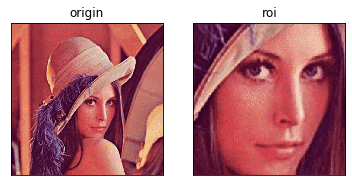

In [29]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
x = 250
y = 230
length = 200
width = 200
img = cv.imread("exp_images/pic.png",1)
roi = img[x:x + length, y:y + width]

plt.subplot(121),plt.imshow(img[:, :, ::-1]);plt.title("origin")
plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(roi[:, :, ::-1]);plt.title("roi")
plt.xticks([]),plt.yticks([])
plt.show()

# 图像的逻辑运算
逻辑运算包括按位与（AND）、或（OR）、非（NOT）、异或（XOR）。例如，在图片的左上角位置加上logo，如果直接将两幅图片相加会直接改变图片的颜色，如果直接使用图像混合会改变图片的透明度。因此可以如下操作：
截取左上角ROI区域，将把logo加在上面。

![](images/2023-08-11-15-07-48.png)

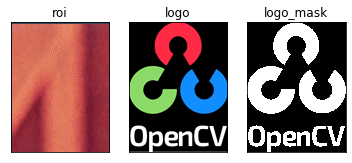

In [30]:
import cv2 as cv
import numpy as np

logo = cv.imread("exp_images/logo.png")
pic = cv.imread("exp_images/pic.png")
mask = cv.imread("exp_images/logo_mask.png",-1)

rows, cols = logo.shape[:2]
roi = pic[:rows, :cols]

plt.subplot(131),plt.imshow(roi[:, :, ::-1]);plt.title("roi")
plt.xticks([]),plt.yticks([])
plt.subplot(132),plt.imshow(logo[:, :, ::-1]);plt.title("logo")
plt.xticks([]),plt.yticks([])
plt.subplot(133),plt.imshow(mask, cmap='gray');plt.title("logo_mask")
plt.xticks([]),plt.yticks([])
plt.show()

这时需要使用logo图像的掩膜（mask），掩膜就是用一副二值化图片对另外一副图片进行局部遮挡。

由于掩膜的遮挡区域像素值为0，所以我们需要用cv.bitwise_not()对结果取反。

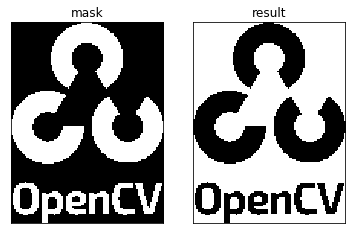

In [31]:
mask_inv = cv.bitwise_not(mask)

# 可视化
plt.subplot(121),plt.imshow(mask, cmap = "gray");plt.title("mask")
plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(mask_inv, cmap = "gray");plt.title("result")
plt.xticks([]),plt.yticks([])
plt.show()

将结果与ROI区域进行逻辑运算提取logo以外的背景,这里我们使用bitwise_and()按位与函数。

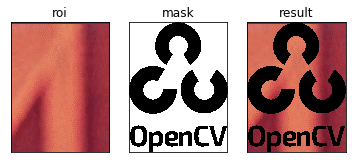

In [32]:
back = cv.bitwise_and(roi, roi, mask=mask_inv)

# 可视化
plt.subplot(131),plt.imshow(roi[:, :, ::-1]);plt.title("roi")
plt.xticks([]),plt.yticks([])
plt.subplot(132),plt.imshow(mask_inv, cmap = "gray");plt.title("mask")
plt.xticks([]),plt.yticks([])
plt.subplot(133),plt.imshow(back[:, :, ::-1]);plt.title("result")
plt.xticks([]),plt.yticks([])
plt.show()

将背景于logo相加，就可以达到预想的效果

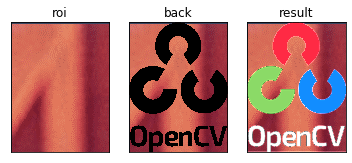

In [33]:
dst = cv.add(back, logo)

# 可视化
plt.subplot(131),plt.imshow(roi[:, :, ::-1]);plt.title("roi")
plt.xticks([]),plt.yticks([])
plt.subplot(132),plt.imshow(back[:, :, ::-1]);plt.title("back")
plt.xticks([]),plt.yticks([])
plt.subplot(133),plt.imshow(dst[:, :, ::-1]);plt.title("result")
plt.xticks([]),plt.yticks([])
plt.show()

现在我们只将处理完成后的ROI区域，覆盖原图像即可。

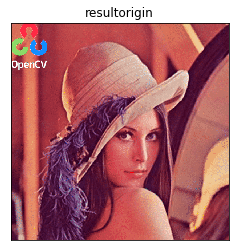

In [34]:
pic[:rows, :cols] = dst
plt.imshow(pic[:, :, ::-1]);plt.title("resultorigin")
plt.xticks([]),plt.yticks([])
plt.show()